In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
df = pd.read_csv(r'C:/Users/84393/OneDrive - CÔNG TY TNHH OFFICIENCE/PYTHON/Parental+Leave/parental_leave.csv', encoding= 'unicode_escape')
df = df[['Company','Industry','Paid Maternity Leave','Unpaid Maternity Leave','Paid Paternity Leave','Unpaid Paternity Leave']].sort_values(by='Paid Maternity Leave', ascending=False)
df

,Company,Industry,Paid Maternity Leave,Unpaid Maternity Leave,Paid Paternity Leave,Unpaid Paternity Leave
1023,ASML,NaN,52.0,40.0,NaN,NaN
1543,Scentsy,Consumer Packaged Goods: Packaged Products,52.0,NaN,NaN,NaN
886,LeverX,Information Services: Technology,52.0,0.0,NaN,NaN
1076,Washburn Center For Children,Nonprofit: Civic & Social,52.0,2.0,NaN,NaN
1068,World Vision,Nonprofit: Charity,52.0,0.0,NaN,NaN
...,...,...,...,...,...,...
739,Children's Wisconsin,Healthcare: Hospitals & Clinics,0.0,12.0,NaN,NaN
1561,American Bridge Company,Industrial: Construction Company,0.0,NaN,NaN,NaN
1026,Bunge North America,Natural Resources: Agriculture and Food Proces...,0.0,6.0,NaN,NaN
1029,CHS Inc.,Natural Resources: Agrochemical,0.0,16.0,NaN,NaN


**1. DICTIONARY**
Company : Company name

Industry : Company industry & sub-industry (Industry: Sub-industry)

Paid Maternity Leave : Paid weeks off from work for mothers after the birth of their child

Unpaid Maternity Leave : Unpaid weeks off from work for mothers after the birth of their child

Paid Paternity Leave : Paid weeks off from work for fathers after the birth of their child

Unpaid Paternity Leave : Unpaid weeks off from work for fathers after the birth of their child

 : NOTE: This is user-reported data. Where users report conflicting information, consensus numbers (if any) or the median are shown. "N/A" means no information has been reported.

In [20]:
df.describe(include='all')

,Company,Industry,Paid Maternity Leave,Unpaid Maternity Leave,Paid Paternity Leave,Unpaid Paternity Leave
count,1601,1598,1601.000000,1494.000000,289.000000,64.000000
unique,1600,185,NaN,NaN,NaN,NaN
top,Collins Aerospace,Technology: Software,NaN,NaN,NaN,NaN
freq,2,160,NaN,NaN,NaN,NaN
mean,NaN,NaN,10.909119,6.628849,7.332180,7.734375
std,NaN,NaN,8.024514,9.274953,6.817591,6.831863
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,6.000000,0.000000,2.000000,2.000000
50%,NaN,NaN,11.000000,4.000000,6.000000,6.000000
75%,NaN,NaN,12.000000,10.000000,12.000000,12.000000


In [6]:
df.isnull().sum()

Company                      0
Industry                     3
Paid Maternity Leave         0
Unpaid Maternity Leave     107
Paid Paternity Leave      1312
Unpaid Paternity Leave    1537
Unnamed: 6                1601
Unnamed: 7                1601
Unnamed: 8                1601
Unnamed: 9                1601
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1601 entries, 1023 to 1600
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Company                 1601 non-null   object 
 1   Industry                1598 non-null   object 
 2   Paid Maternity Leave    1601 non-null   float64
 3   Unpaid Maternity Leave  1494 non-null   float64
 4   Paid Paternity Leave    289 non-null    float64
 5   Unpaid Paternity Leave  64 non-null     float64
dtypes: float64(4), object(2)
memory usage: 87.6+ KB


**2. CHECK NULL**

In [8]:
df[df.Industry.isnull()]

,Company,Industry,Paid Maternity Leave,Unpaid Maternity Leave,Paid Paternity Leave,Unpaid Paternity Leave
1023,ASML,NaN,52.0,40.0,NaN,NaN
1025,Rokt,NaN,15.0,0.0,NaN,NaN
1024,INK Communications Co.,NaN,10.0,2.0,NaN,NaN


**COMPANY PER INDUSTRY**

In [15]:
df.groupby(['Industry'])['Company'].count().sort_values( ascending=False)

Industry
Technology: Software                                  160
Technology: Consumer Internet                          64
Educational Services: College & Universities           52
Advertising                                            50
Information Services: Technology                       47
Finance: Diversified                                   47
Consulting Services                                    47
Healthcare: Hospitals & Clinics                        38
Technology: B2B Tech Services                          38
Technology: Manufacturing                              30
Law Firm                                               28
Retail: Shoes, Accessories and Apparel                 28
Finance: Asset Management                              27
Business Services: Staffing & Outsourcing              27
Business Services: Other                               24
Insurance: Health                                      24
Finance: Personal & Commercial Banking                 23
Pharm

**3. TOP PML BY COMPANY**

In [25]:
dfbycompany = df.groupby(['Company']).mean()
# .sort_values(by= 'Value', ascending=False)
dfbycompany = dfbycompany.sort_values(by='Paid Maternity Leave', ascending=False).reset_index()
dfbycompany

C:\Users\84393\AppData\Local\Temp\ipykernel_2660\2462844791.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfbycompany = df.groupby(['Company']).mean()


,Company,Paid Maternity Leave,Unpaid Maternity Leave,Paid Paternity Leave,Unpaid Paternity Leave
0,Veritas Law,52.0,0.0,NaN,NaN
1,Spokane County,52.0,26.0,NaN,NaN
2,ASML,52.0,40.0,NaN,NaN
3,University of British Columbia,52.0,0.0,NaN,NaN
4,Washburn Center For Children,52.0,2.0,NaN,NaN
...,...,...,...,...,...
1595,ProMedica,0.0,NaN,NaN,NaN
1596,Project Renewal,0.0,0.0,NaN,NaN
1597,GoDigital Media Group,0.0,NaN,0.0,NaN
1598,Red Robin,0.0,12.0,NaN,NaN


In [26]:
import seaborn as sns
sns.set_style('whitegrid')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]),
 [Text(0, 0, 'American Income Life'),
  Text(1, 0, 'ASML'),
  Text(2, 0, 'JHC Systems'),
  Text(3, 0, 'Scentsy'),
  Text(4, 0, 'Rangle.io'),
  Text(5, 0, 'Spokane County'),
  Text(6, 0, 'Cloudworkers'),
  Text(7, 0, 'WorkJam'),
  Text(8, 0, 'MTX Group Inc'),
  Text(9, 0, 'Veritas Law'),
  Text(10, 0, 'Netflix'),
  Text(11, 0, 'Bitdefender'),
  Text(12, 0, 'World Vision'),
  Text(13, 0, 'Reliance Industries, Ltd'),
  Text(14, 0, 'University of British Columbia'),
  Text(15, 0, 'Dynatrace'),
  Text(16, 0, 'LeverX'),
  Text(17, 0, 'FlixBus'),
  Text(18, 0, 'Intact Financial Corporation'),
  Text(19, 0, 'Washburn Center For Children'),
  Text(20, 0, 'Grant Thornton'),
  Text(21, 0, 'Bhel'),
  Text(22, 0, 'Intercontinental Hotels Group'),
  Text(23, 0, 'Ogilvy'),
  Text(24, 0, 'Naval Medi

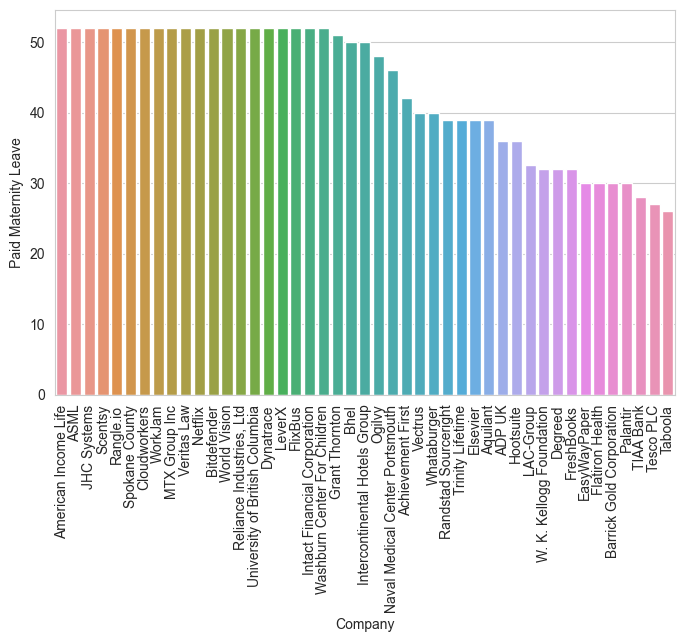

In [33]:
plt.figure(figsize=(8, 5))
sns.barplot(data=dfbycompany.head(45), x="Company", y="Paid Maternity Leave" )
plt.xticks(rotation=90)

**4. LEAVE DISTRIBUTION**

In [40]:
dfleave = dfbycompany[['Paid Maternity Leave', 'Unpaid Maternity Leave', 'Paid Paternity Leave', 'Unpaid Paternity Leave']]
# pd.DataFrame(top_sale_reg.sum(), columns=['a', 'b'])
dfleave = dfleave.sum().reset_index()
dfleave = dfleave.rename(columns={"index": "Company", 0: "Leave"})
dfleave

,Company,Leave
0,Paid Maternity Leave,17457.5
1,Unpaid Maternity Leave,9897.5
2,Paid Paternity Leave,2115.0
3,Unpaid Paternity Leave,495.0


In [35]:
labels = dfleave['Company']
sizes = dfleave['Leave']

([<matplotlib.patches.Wedge at 0x2935bcb12d0>,
 [Text(-1.0632481975781305, -0.28196324290030544, 'Paid Maternity Leave'),
  Text(1.0998816553234467, -0.01613518772605869, 'Unpaid Maternity Leave'),
  Text(0.35202979842688126, 1.0421492316456074, 'Paid Paternity Leave'),
  Text(0.05702639317968195, 1.098520819320652, 'Unpaid Paternity Leave')],
 [Text(-0.5799535623153439, -0.15379813249107568, '58.3%'),
  Text(0.5999354483582435, -0.008801011486941103, '33.0%'),
  Text(0.19201625368738975, 0.5684450354430585, '7.1%'),
  Text(0.031105305370735605, 0.599193174174901, '1.7%')])

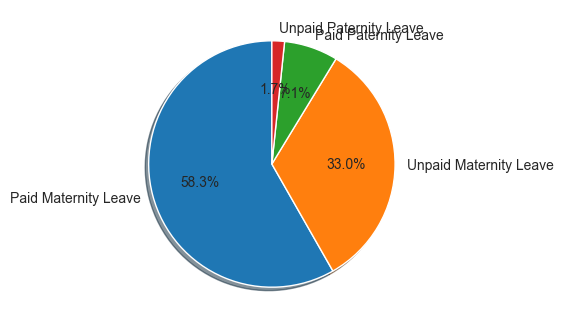

In [38]:
plt.figure(figsize=(6, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

**5. TOP PML BY INDUSTRY**

In [43]:
new = df["Industry"].str.split(":", n = 1, expand = True)
df['Company Industry'] = new[0]
df['Sub-industry Group'] = new[1]
df

,Company,Industry,Paid Maternity Leave,Unpaid Maternity Leave,Paid Paternity Leave,Unpaid Paternity Leave,Company Industry,Sub-industry Group
1023,ASML,NaN,52.0,40.0,NaN,NaN,NaN,NaN
1543,Scentsy,Consumer Packaged Goods: Packaged Products,52.0,NaN,NaN,NaN,Consumer Packaged Goods,Packaged Products
886,LeverX,Information Services: Technology,52.0,0.0,NaN,NaN,Information Services,Technology
1076,Washburn Center For Children,Nonprofit: Civic & Social,52.0,2.0,NaN,NaN,Nonprofit,Civic & Social
1068,World Vision,Nonprofit: Charity,52.0,0.0,NaN,NaN,Nonprofit,Charity
...,...,...,...,...,...,...,...,...
739,Children's Wisconsin,Healthcare: Hospitals & Clinics,0.0,12.0,NaN,NaN,Healthcare,Hospitals & Clinics
1561,American Bridge Company,Industrial: Construction Company,0.0,NaN,NaN,NaN,Industrial,Construction Company
1026,Bunge North America,Natural Resources: Agriculture and Food Proces...,0.0,6.0,NaN,NaN,Natural Resources,Agriculture and Food Processing
1029,CHS Inc.,Natural Resources: Agrochemical,0.0,16.0,NaN,NaN,Natural Resources,Agrochemical


In [52]:
dfbyindustry = df.groupby(['Company Industry']).max()
# .sort_values(by= 'Value', ascending=False)
dfbyindustry = dfbyindustry.sort_values(by='Paid Maternity Leave', ascending=False).reset_index()
dfbyindustry

C:\Users\84393\AppData\Local\Temp\ipykernel_2660\3478691999.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  dfbyindustry = df.groupby(['Company Industry']).max()


,Company Industry,Company,Industry,Paid Maternity Leave,Unpaid Maternity Leave,Paid Paternity Leave,Unpaid Paternity Leave
0,Government,World Health Organization,Government: State,52.0,52.0,6.0,12.0
1,Educational Services,Zearn,Educational Services: Tutoring,52.0,52.0,12.0,12.0
2,Nonprofit,uAspire,Nonprofit: Trade Organization,52.0,52.0,24.0,12.0
3,Technology,panOpen,Technology: Software,52.0,52.0,26.0,24.0
4,Law Firm,Wynyard Wood,Law Firm,52.0,52.0,16.0,NaN
5,Insurance,Willis Towers Watson,Insurance: Reinsurance,52.0,40.0,12.0,6.0
6,Information Services,ZoomInfo,Information Services: Technology,52.0,36.0,35.0,NaN
7,Transportation,Virgin Hyperloop One,Transportation: Rental,52.0,52.0,16.0,NaN
8,Conglomerate,Vectrus,Conglomerate,52.0,24.0,6.0,NaN
9,Consulting Services,ZS,Consulting Services,52.0,52.0,21.0,12.0


In [51]:
dfbyindustry2 = df.groupby(['Industry']).agg({'Company':'count', 'Paid Maternity Leave': 'sum', 'Unpaid Maternity Leave': 'sum', 'Paid Paternity Leave': 'sum', 'Unpaid Paternity Leave': 'sum'})
    # ['Paid Maternity Leave', 'Unpaid Maternity Leave', 'Paid Paternity Leave', 'Unpaid Paternity Leave']).count(['Company'])
dfbyindustry2 = dfbyindustry2.sort_values(by='Company', ascending=False).reset_index()
dfbyindustry2

,Industry,Company,Paid Maternity Leave,Unpaid Maternity Leave,Paid Paternity Leave,Unpaid Paternity Leave
0,Technology: Software,160,2025.5,921.5,231.5,90.0
1,Technology: Consumer Internet,64,985.5,217.5,251.0,37.0
2,Educational Services: College & Universities,52,475.5,411.0,13.0,12.0
3,Advertising,50,470.5,258.0,22.0,6.0
4,Information Services: Technology,47,540.0,229.0,16.0,0.0
5,Finance: Diversified,47,647.5,183.0,154.5,0.0
6,Consulting Services,47,565.5,419.0,83.0,17.0
7,Healthcare: Hospitals & Clinics,38,199.0,154.0,2.0,12.0
8,Technology: B2B Tech Services,38,412.0,239.0,79.0,12.0
9,Technology: Manufacturing,30,366.0,151.0,52.5,0.0


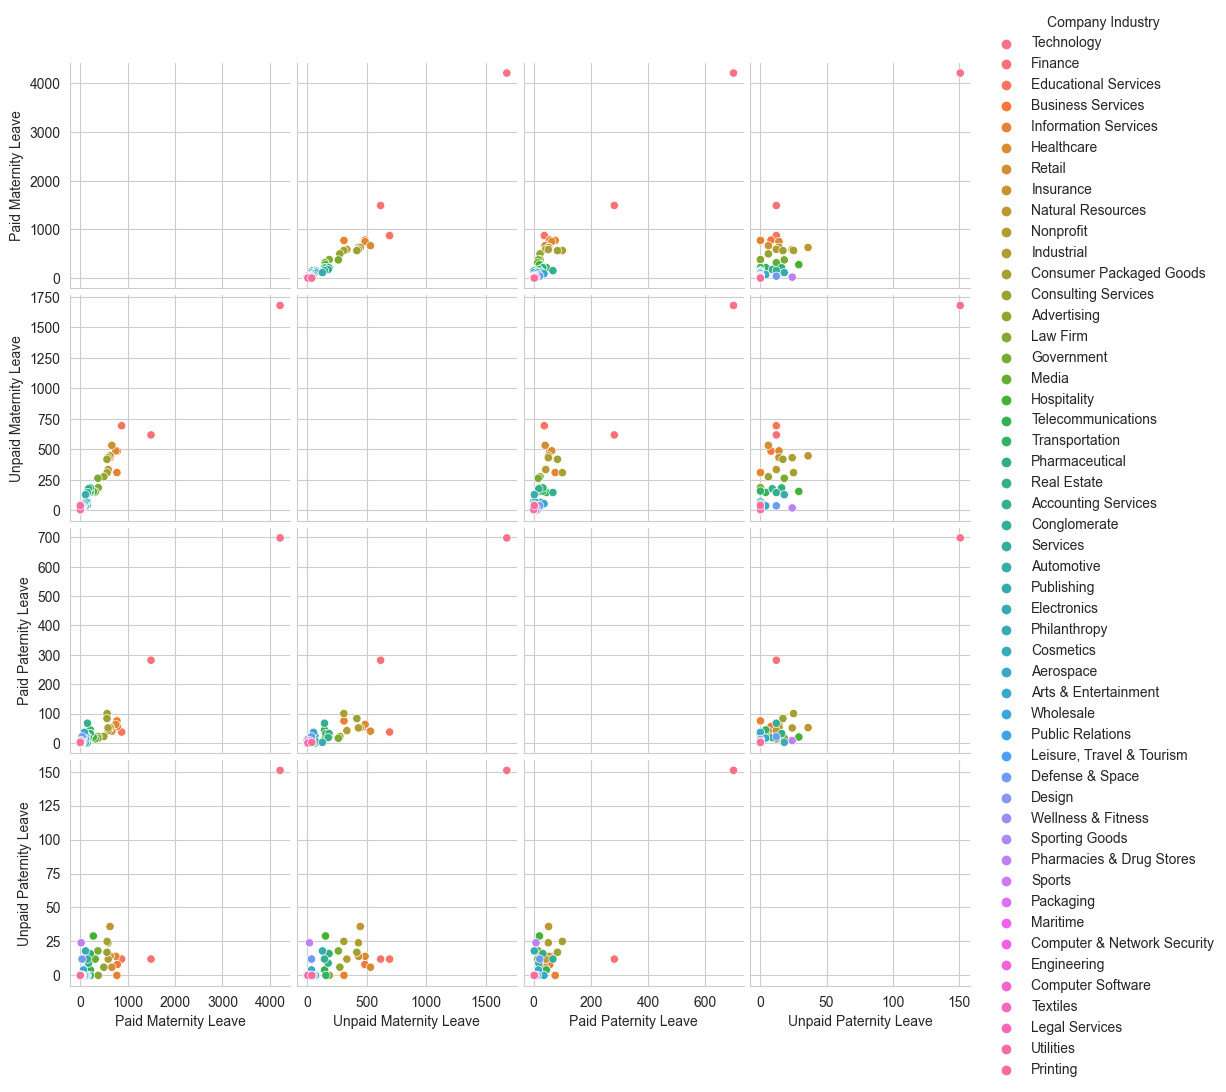

In [45]:
sns.pairplot(dfbyindustry, hue='Company Industry')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]),
 [Text(0, 0, 'Technology'),
  Text(1, 0, 'Finance'),
  Text(2, 0, 'Educational Services'),
  Text(3, 0, 'Business Services'),
  Text(4, 0, 'Information Services'),
  Text(5, 0, 'Healthcare'),
  Text(6, 0, 'Retail'),
  Text(7, 0, 'Insurance'),
  Text(8, 0, 'Natural Resources'),
  Text(9, 0, 'Nonprofit'),
  Text(10, 0, 'Industrial'),
  Text(11, 0, 'Consumer Packaged Goods'),
  Text(12, 0, 'Consulting Services'),
  Text(13, 0, 'Advertising'),
  Text(14, 0, 'Law Firm'),
  Text(15, 0, 'Government'),
  Text(16, 0, 'Media'),
  Text(17, 0, 'Hospitality'),
  Text(18, 0, 'Telecommunications'),
  Text(19, 0, 'Transportation'),
  Text(20, 0, 'Pharmaceutical'),
  Text(21, 0, 'Real Estate'),
  Text(22, 0, 'Accounting Services'),
  Text(23, 0, 'Conglomerate'),
  Text(24, 0, 'Services'),
  Text(25, 

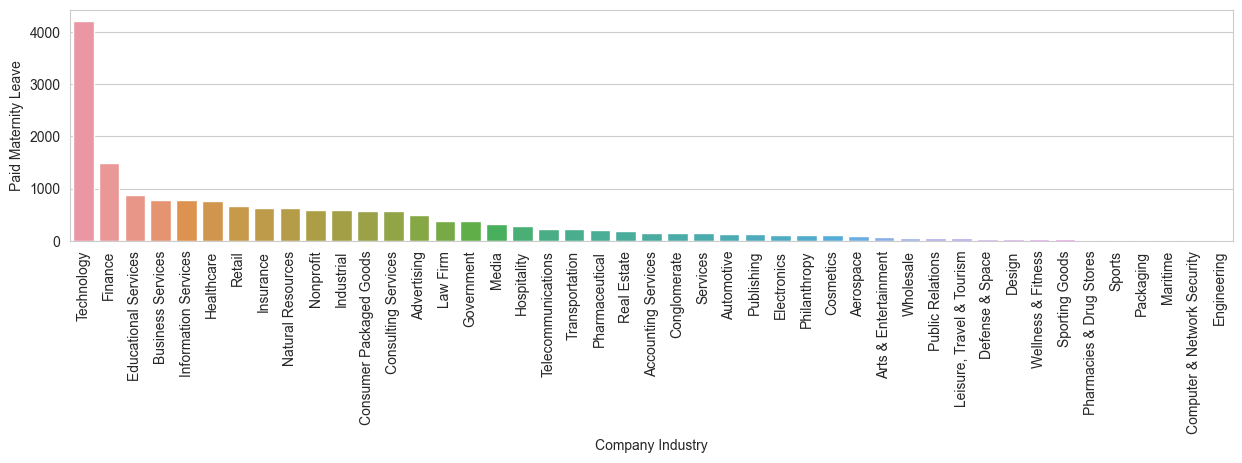

In [48]:
plt.figure(figsize=(15, 3))
sns.barplot(data=dfbyindustry.head(45), x="Company Industry", y="Paid Maternity Leave" )
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]),
 [Text(0, 0, 'Technology'),
  Text(1, 0, 'Finance'),
  Text(2, 0, 'Educational Services'),
  Text(3, 0, 'Business Services'),
  Text(4, 0, 'Information Services'),
  Text(5, 0, 'Healthcare'),
  Text(6, 0, 'Retail'),
  Text(7, 0, 'Insurance'),
  Text(8, 0, 'Natural Resources'),
  Text(9, 0, 'Nonprofit'),
  Text(10, 0, 'Industrial'),
  Text(11, 0, 'Consumer Packaged Goods'),
  Text(12, 0, 'Consulting Services'),
  Text(13, 0, 'Advertising'),
  Text(14, 0, 'Law Firm'),
  Text(15, 0, 'Government'),
  Text(16, 0, 'Media'),
  Text(17, 0, 'Hospitality'),
  Text(18, 0, 'Telecommunications'),
  Text(19, 0, 'Transportation'),
  Text(20, 0, 'Pharmaceutical'),
  Text(21, 0, 'Real Estate'),
  Text(22, 0, 'Accounting Services'),
  Text(23, 0, 'Conglomerate'),
  Text(24, 0, 'Services'),
  Text(25, 

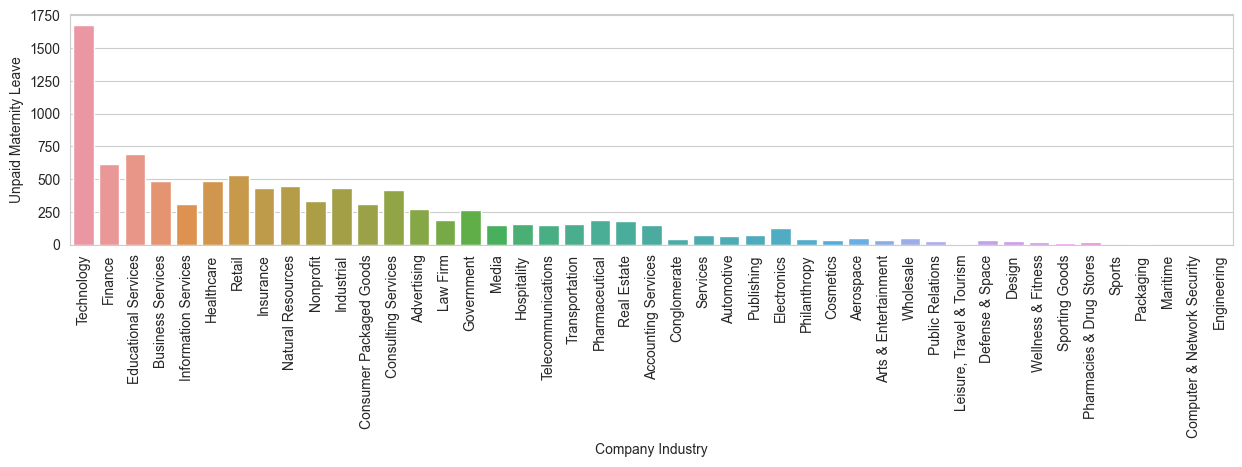

In [49]:
plt.figure(figsize=(15, 3))
sns.barplot(data=dfbyindustry.head(45), x="Company Industry", y="Unpaid Maternity Leave" )
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]),
 [Text(0, 0, 'Technology'),
  Text(1, 0, 'Finance'),
  Text(2, 0, 'Consumer Packaged Goods'),
  Text(3, 0, 'Consulting Services'),
  Text(4, 0, 'Information Services'),
  Text(5, 0, 'Accounting Services'),
  Text(6, 0, 'Healthcare'),
  Text(7, 0, 'Business Services'),
  Text(8, 0, 'Insurance'),
  Text(9, 0, 'Natural Resources'),
  Text(10, 0, 'Industrial'),
  Text(11, 0, 'Telecommunications'),
  Text(12, 0, 'Nonprofit'),
  Text(13, 0, 'Retail'),
  Text(14, 0, 'Educational Services'),
  Text(15, 0, 'Aerospace'),
  Text(16, 0, 'Transportation'),
  Text(17, 0, 'Pharmaceutical'),
  Text(18, 0, 'Philanthropy'),
  Text(19, 0, 'Automotive'),
  Text(20, 0, 'Law Firm'),
  Text(21, 0, 'Advertising'),
  Text(22, 0, 'Defense & Space'),
  Text(23, 0, 'Hospitality'),
  Text(24, 0, 'Real Estate'),


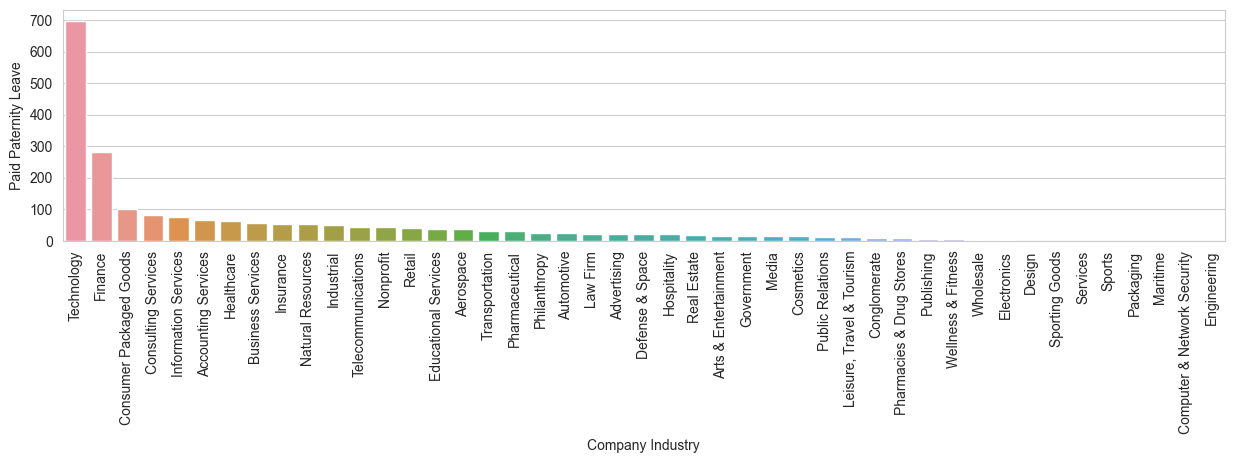

In [51]:
plt.figure(figsize=(15, 3))
sns.barplot(data=dfbyindustry.head(45).sort_values(by='Paid Paternity Leave',ascending=False), x="Company Industry", y="Paid Paternity Leave" )
plt.xticks(rotation=90)

**6. TOP LEAVE by INDUSTRY**

In [60]:
dfbyindustry2 = dfbyindustry[['Company Industry','Paid Maternity Leave', 'Unpaid Maternity Leave', 'Paid Paternity Leave', 'Unpaid Paternity Leave']]
dfbyindustry2 = dfbyindustry2.groupby(by=['Company Industry']).sum()
dfbyindustry2 
# dfbyindustry2 = dfbyindustry.groupby(['Company Industry']).sum()
# # .sort_values(by= 'Value', ascending=False)
# dfbyindustry = dfbyindustry2.sort_values(by='Paid Maternity Leave', ascending=False).reset_index()
# dfbyindustry

,Paid Maternity Leave,Unpaid Maternity Leave,Paid Paternity Leave,Unpaid Paternity Leave
Company Industry,,,,
Accounting Services,154.0,147.0,67.0,12.0
Advertising,498.5,276.0,22.0,6.0
Aerospace,90.0,55.0,36.0,0.0
Arts & Entertainment,71.0,38.0,16.5,4.0
Automotive,126.5,66.5,26.0,0.0
Business Services,782.5,486.5,56.0,8.0
Computer & Network Security,13.0,0.0,0.0,0.0
Computer Software,12.0,0.0,6.0,0.0
Conglomerate,150.5,45.5,8.0,0.0


<function matplotlib.pyplot.show(close=None, block=None)>

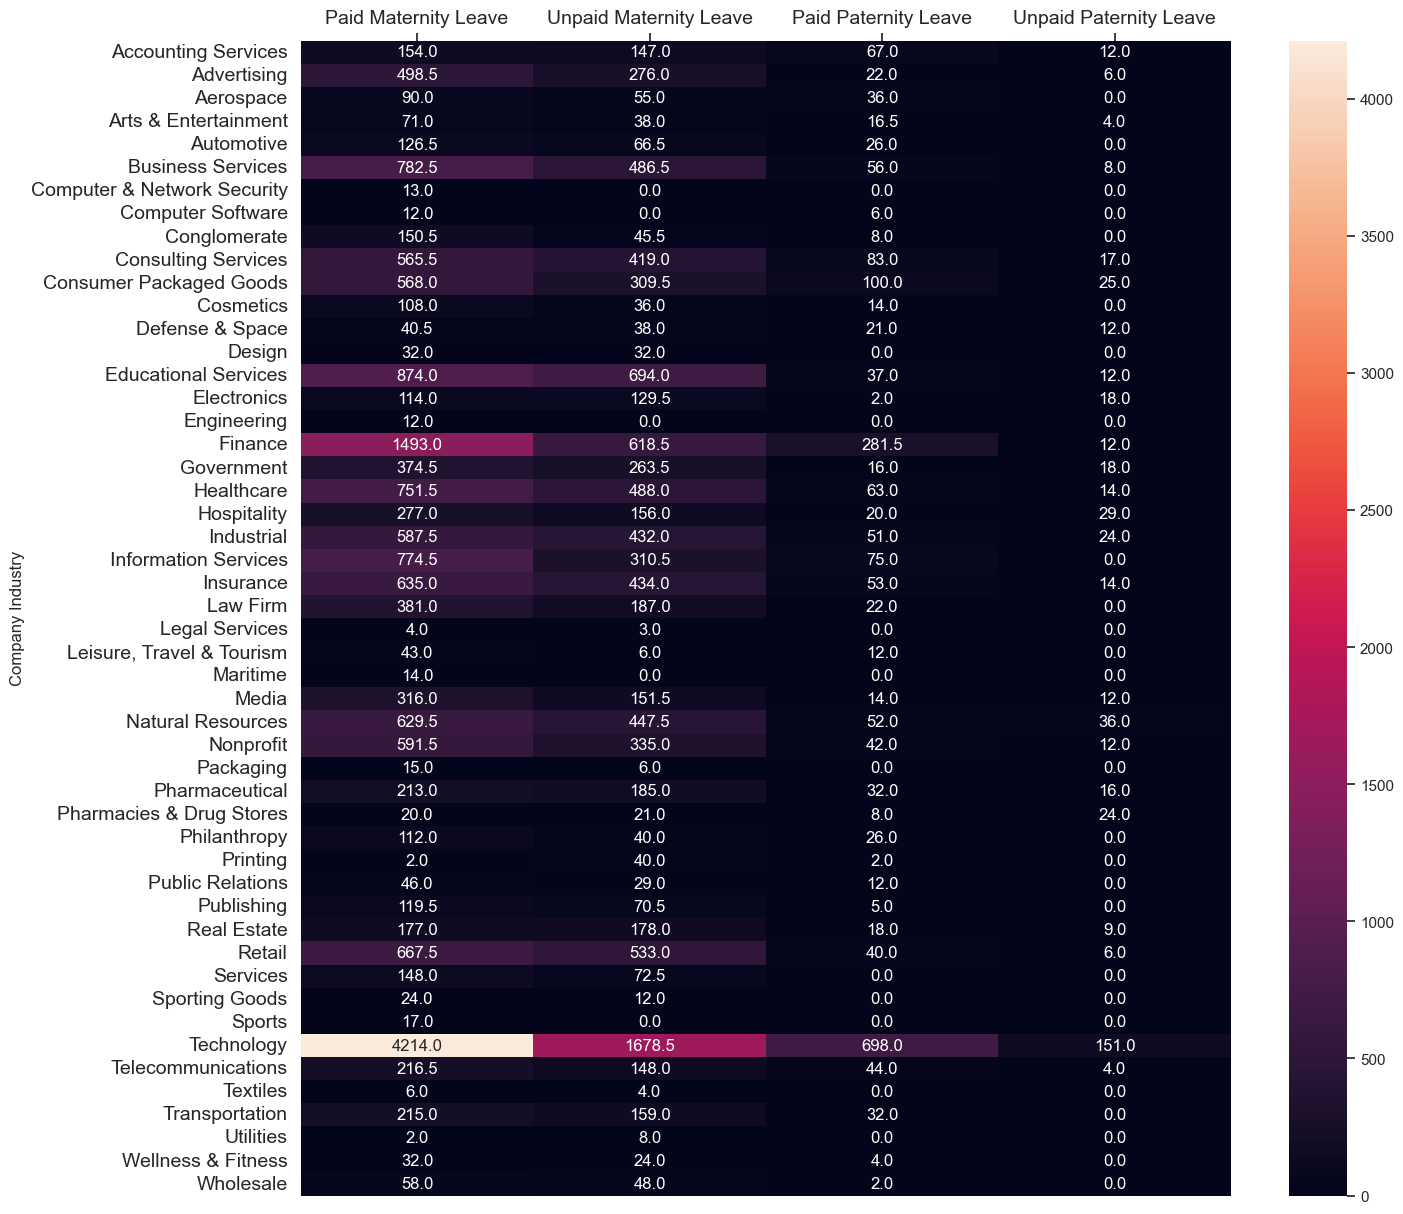

In [66]:
plt.figure(figsize=(15,15))
sns.set(font_scale = 1)
sns.heatmap(dfbyindustry2, annot=True, fmt= '.1f').xaxis.tick_top()
#.xaxis.tick_top() is to reverse the x asix label from bottom to top
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show  

https://stackoverflow.com/questions/66822222/heatmap-with-multiple-colormaps-by-column 

**UNPIVOT LEAVE**

In [68]:
dfbyindustry2 = df.groupby(['Industry']).max(['Paid Maternity Leave', 'Unpaid Maternity Leave', 'Paid Paternity Leave', 'Unpaid Paternity Leave'])
# .sort_values(by= 'Value', ascending=False)
dfbyindustry2 = dfbyindustry2.sort_values(by='Industry', ascending=False).reset_index()
dfbyindustry2
dfunpivot = pd.melt(dfbyindustry2, 
   id_vars = 'Industry', 
   value_vars = ['Paid Maternity Leave', 'Unpaid Maternity Leave', 'Paid Paternity Leave', 'Unpaid Paternity Leave'], 
   var_name = 'Leave Type', 
   value_name = 'Leave Week',
   ignore_index = False)
dfunpivot = dfunpivot.sort_values(by='Leave Week', ascending=False).fillna('')
dfunpivot


,Industry,Leave Type,Leave Week
154,Educational Services: Management,Unpaid Maternity Leave,52.0
166,Conglomerate,Paid Maternity Leave,52.0
156,Educational Services: College & Universities,Paid Maternity Leave,52.0
162,Consumer Packaged Goods: Packaged Products,Paid Maternity Leave,52.0
74,Nonprofit: Charity,Paid Maternity Leave,52.0
...,...,...,...
177,Automotive: Parts,Unpaid Paternity Leave,
178,Automotive: Manufacturers,Unpaid Paternity Leave,
179,Automotive: Dealers,Unpaid Paternity Leave,
181,Aerospace,Unpaid Paternity Leave,


In [71]:
file_name = 'C:/Users/84393/OneDrive - CÔNG TY TNHH OFFICIENCE/PYTHON/Parental+Leave/parental_leave_df.csv'
dfunpivot.to_csv(file_name, sep=',', encoding='utf-8')